# Определение перспективного тарифа для телеком компании

В нашем распоряжении данные оператора сотовой связи.\
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». \
**Необходимо узнать, какой тариф приносит бОльшую прибыль.**


Для этого проведем предварительный анализ тарифов на небольшой выборке клиентов (500 пользователей), о которых известны следующие данные: 
- кто эти пользователи, 
- откуда, 
- каким тарифом пользуются, 
- сколько звонков и сообщений каждый отправил за 2018 год.

Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.

<div style="border:solid blue 2px; padding: 20px">
    
## Описание тарифов
**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
    
**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
<br>  
<br>

*«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Этапы исследования

[Шаг 1. Откроем файлы с данными локально, изучим общую информацию, исправим недочеты и добавим расчеты](#a)
- [Файл "data_calls"](#dc)
- [Файл "data_internet"](#di)
- [Файл "data_messages"](#dm)
- [Файл "data_tariffs"](#dt)
- [Файл "data_users"](#du)

[Шаг 2. Объединение сводных таблиц по трафику для каждого пользователя по месяцам](#b)

[Шаг 3. Проанализируем данные](#с)

[Шаг 4. Проверим гипотезы](#d)

[Шаг 5. Вывод](#e)

<a id='a'></a>

## Откроем файлы с данными локально, изучим общую информацию, исправим недочеты и добавим расчеты

Изучать данные по каждому файлу будем локально - исправим в них недочеты, приведем данные к нужному типу, и только после этого объединим в единый файл.

In [1]:
import pandas as pd

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

<a id='dc'></a>

### Файл "data_calls"

Информация о звонках:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [2]:
#ИЗУЧИМ ФАЙЛ "data_calls"

display(data_calls.describe())
display(data_calls.info())
data_calls

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


**Можем наблюдать 2 недочета в этом файле:**
1. Длительность "0.0" минут. Звонки могут быть пропущенными. Поэтому пока, оставим как есть, если дальше в исследовании потребуется использовать параметр длительности >0 минут, избавимся от этих данных.
2. Тип данных столбца "call_date". Поменяем на datatime.

In [3]:
import numpy as np
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['duration'] = data_calls['duration'].round(0).astype('int')
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,5,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,4,1499


Теперь посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [4]:
#Для этого напишем функцию разбива дат по месяцам
def month(data, column):
    data['month'] = pd.DatetimeIndex(data[column]).month

month(data_calls, 'call_date')
data_calls_group = data_calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count', 'sum'])
data_calls_group.columns = ['count_calls', 'minutes_sum']
data_calls_group

count_calls  minutes_sum
user_id month                          
1000    5               22          149
        6               43          159
        7               47          319
        8               52          391
        9               58          439
...                    ...          ...
1498    10              41          230
1499    9                9           64
        10              68          429
        11              74          574
        12              69          467

[3174 rows x 2 columns]

<a id='di'></a>

### Файл "data_internet"

Информация об интернет-сессиях:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [5]:
#ИЗУЧИМ ФАЙЛ "data_internet"

display(data_internet.describe())
display(data_internet.info())
data_internet

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


**Недочеты:**
- Тип данных столбца "session_date". Поменяем на datatime.
- Обнаружили столбец "Unnamed: 0", который не был заявлен при получении данных. Удалим его.

**Про нулевые интернет-сессии есть 3 предположения:**

1. В тариф включено безлимитное использование мессенджеров, поэтому их использовании фиксируется, как интернет-сессия, но объем потраченного интернет-трафика, в свою очередь, остается нулевым.
2. Пользователи могли серфить в интернете, не используя при этом мобильный трафик, а, скажем, подключившись к wi-fi.
3. В браузере не загрузились страницы (по разным причинам). Как итог - нулевая интернет-сессия.
    
Подсчет процента нулевых сессий оставил в коде ниже.

In [6]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet = data_internet.drop('Unnamed: 0', 1)
data_internet['mb_used'] = data_internet['mb_used'].round(0).astype('int')

# Посчитаем процент нулевых интернет-сессий
percent_null = (data_internet['mb_used'] == 0).sum() / len(data_internet['mb_used'])
print('Процент нулевых сессий: {:.2%}'.format(percent_null))

print()
print()
data_internet.info()

Процент нулевых сессий: 13.15%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.6+ MB


Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя.

In [7]:
month(data_internet, 'session_date')
    
data_internet_group = data_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['sum'])
data_internet_group.columns = ['volume_mb_used']
data_internet_group

volume_mb_used
user_id month                
1000    5                2253
        6               23232
        7               14004
        8               14054
        9               14569
...                       ...
1498    10              20581
1499    9                1846
        10              17792
        11              17963
        12              13055

[3203 rows x 1 columns]

<a id='dm'></a>

### Файл "data_messages"

Информация о сообщениях:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [8]:
#ИЗУЧИМ ФАЙЛ "data_messages"

display(data_messages.info())
data_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


**Изменим тип данных столбца "message_date" на datetime**

In [9]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Посчитаем количество отправленных сообщений по месяцам для каждого пользователя

In [10]:
month(data_messages, 'message_date')

data_messages_group = data_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = ['count'])
data_messages_group.columns = ['count_messages']
data_messages_group

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

<a id='dt'></a>

### Файл "data_tariffs"

Информация о тарифах:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то - со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [11]:
#ИЗУЧИМ ФАЙЛ "data_tariffs"

data_tariffs.columns = ['messages_include', 'mb_per_month_include', 'minutes_include', 'rub_monthly_fe', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
data_tariffs

,messages_include,mb_per_month_include,minutes_include,rub_monthly_fe,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Видим наглядное различие тарифов по каждому параметру.

<a id='du'></a>

### Файл "data_users"

Информация о пользователях:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [12]:
#ИЗУЧИМ ФАЙЛ "data_users"

display(data_users.describe())
display(data_users.info())
data_users

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


**Изменим тип данных столбца "reg_date" на datetime**

In [13]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Можем наблюдать 38 пользователей, которые прекратили пользоваться тарифами.

**Как итог изучения данных можно отметить, что основной недочет в файлах состоял в неправильности типа данных определенных столбцов, на месте которых должен быть тип datetime. К нему и привели. А также удалили появившийся столбец в датасете.**

Теперь объединим необходимые файлы для всеобщего понимания.

<a id='b'></a>

## Объединение сводных таблиц по трафику для каждого пользователя по месяцам

In [14]:
data_cis = data_calls_group.join(data_internet_group, how = 'outer')
data_cis
data_cis = data_cis.join(data_messages_group, how = 'outer').reset_index()
data_cis.head()

# Заменим значения Nan, появившиеся в столбцах "count_calls", "minutes_sum", "volume_mb_used", "count_messages" 
# после объединения таблиц, на 0, так как этими видами услуг не пользовались раз нет данных.
# Для этого напишем функцию
def zamena(column):
    data_cis[column] = data_cis[column].fillna('0').astype('int')
    
zamena("count_calls")
zamena("minutes_sum")
zamena("volume_mb_used")
zamena("count_messages")

#data_cis.head(26)#.info()

**Сведем все необходимые данные в одну таблицу**

In [15]:
data = data_users.merge(data_cis, on = 'user_id', how = 'outer')
data = data.merge(data_tariffs, on = 'tariff', how = 'outer')
data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_calls,minutes_sum,volume_mb_used,count_messages,messages_include,mb_per_month_include,minutes_include,rub_monthly_fe,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,149.0,2253.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,159.0,23232.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,319.0,14004.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,391.0,14054.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,439.0,14569.0,57.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,230.0,20581.0,42.0,50,15360,500,550,200,3,3
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,64.0,1846.0,11.0,50,15360,500,550,200,3,3
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,429.0,17792.0,48.0,50,15360,500,550,200,3,3
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,574.0,17963.0,59.0,50,15360,500,550,200,3,3


**Теперь добавим столбец помесячной выручки с каджого пользователя.**

Для этого: вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [16]:
def profit(data):
    
    gb = 1024
    profit = 0 
    
    if data['minutes_sum'] > data['minutes_include']:
        profit += (data['minutes_sum'] - data['minutes_include']) * data['rub_per_minute']
        
    if data['volume_mb_used'] > data['mb_per_month_include']:
        profit += (int(data['volume_mb_used']/gb) - data['mb_per_month_include']/gb) * data['rub_per_gb']
    
    if data['count_messages'] > data['messages_include']:
        profit += (data['count_messages'] - data['messages_include']) * data['rub_per_message']
    profit += data['rub_monthly_fe']
    return profit

data['profit'] = data.apply(profit, axis=1).reset_index(drop = True)
data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_calls,...,volume_mb_used,count_messages,messages_include,mb_per_month_include,minutes_include,rub_monthly_fe,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,...,2253.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,...,23232.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,...,14004.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,...,14054.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,...,14569.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,...,20581.0,42.0,50,15360,500,550,200,3,3,1550.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,...,1846.0,11.0,50,15360,500,550,200,3,3,550.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,...,17792.0,48.0,50,15360,500,550,200,3,3,950.0
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,...,17963.0,59.0,50,15360,500,550,200,3,3,1199.0


<a id='с'></a>

## Проанализируем данные 

Опишим поведение клиентов оператора, исходя из нашей выборки.\
Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
Посчитаем среднее, дисперсию, стандартное отклонение.

  Статистическая характеристика                                      smart  \
0                       Среднее    minutes_sum    364.96966
dtype: float64   
1                     Дисперсия  minutes_sum    4599.228803
dtype: float64   
2        Стандартное отклонение    minutes_sum    67.817614
dtype: float64   

                                       ultra  
0   minutes_sum    467.956884
dtype: float64  
1  minutes_sum    5342.783377
dtype: float64  
2    minutes_sum    73.094346
dtype: float64  


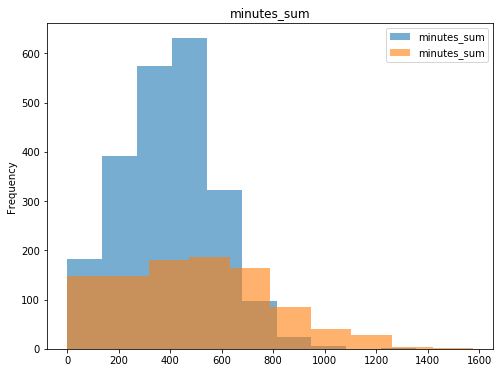

  Статистическая характеристика                                       smart  \
0                       Среднее  count_messages    31.413211
dtype: float64   
1                     Дисперсия  count_messages    26.044827
dtype: float64   
2        Стандартное отклонение   count_messages    5.103413
dtype: float64   

                                         ultra  
0   count_messages    43.714983
dtype: float64  
1  count_messages    151.793988
dtype: float64  
2    count_messages    12.32047
dtype: float64  


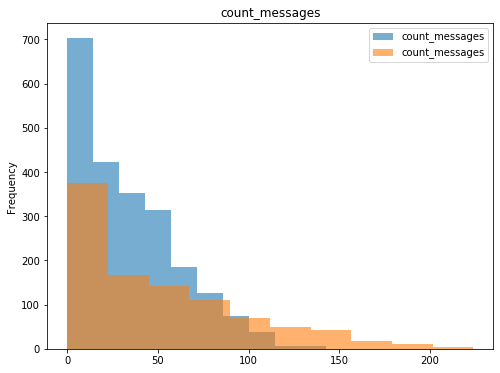

  Статистическая характеристика  \
0                       Среднее   
1                     Дисперсия   
2        Стандартное отклонение   

                                           smart  \
0  volume_mb_used    15058.475688
dtype: float64   
1  volume_mb_used    7.134943e+06
dtype: float64   
2   volume_mb_used    2671.131437
dtype: float64   

                                           ultra  
0  volume_mb_used    18205.837373
dtype: float64  
1  volume_mb_used    8.915654e+06
dtype: float64  
2   volume_mb_used    2985.909202
dtype: float64  


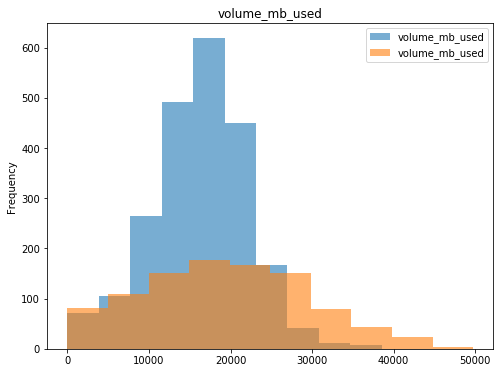

(None, None)

In [17]:
import numpy as np
import matplotlib.pyplot as plt


smart_group = data.query('tariff == "smart"')
ultra_group = data.query('tariff == "ultra"')


#Напишем функцию для подсчета среднего, дисперсии и среднего отклонения, а также для выведения графиков
def sravnenie(group, group2, parametr):
    gpt = group.pivot_table(index = 'month', values = parametr, aggfunc = 'mean')
    vs = np.var(gpt, ddof = 1)
    sds = np.std(gpt, ddof = 1)
    
    gpt2 = group2.pivot_table(index = 'month', values = parametr, aggfunc = 'mean')
    vs2 = np.var(gpt2, ddof = 1)
    sds2 = np.std(gpt2, ddof = 1)
    tablica = [
        ['Среднее', gpt.mean(), gpt2.mean()],
        ['Дисперсия', vs, vs2],
        ['Стандартное отклонение', sds, sds2]
    ]
    entries = ['Статистическая характеристика', 'smart', 'ultra']
    itog = pd.DataFrame(data = tablica, columns = entries)
    
    a = group[parametr].plot(kind = 'hist', alpha = 0.6, figsize = (8,6), legend = True)
    group2[parametr].plot(kind = 'hist', alpha = 0.6, ax = a, legend = True)
    a.set_title(parametr)
    return print(itog), plt.show()
    
    
    
    
sravnenie(smart_group, ultra_group, 'minutes_sum')
sravnenie(smart_group, ultra_group, 'count_messages')
sravnenie(smart_group, ultra_group, 'volume_mb_used')


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

За написание таких функций могу только похвалить!

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Прошу обратить внимание, что у графиков сбилась легенда. Также могу посоветовать для вывода на экран таблицы `itog` использовать `display()`. Также можно округлить статистические значения до целых (или до двух знаков после запятой).

</div>


**Сделаем выводы:**
- Количетсво минут разговора: в обоих тарифах лидирует временной промежуток 400-600 минут в месяц, однако у "smart" распределение нормальное со скошенностью вправо, в то время как пользователи "ultra" распределены стабильно одинаково, и лишь после 800 минуты начинается спад. 
- Количество сообщений: как можем видеть, сообщения не особо пользуются спросом, тем не менее, есть пиковая точка около нуля - большинство пользователей пишет до 15 смс в месяц. И далее вниз по наклонной. 
- Объем использованного интернет-трафика: наблюдаем пиковую точку в обоих тарифах в диапазоне 15 - 20 тыс. мб ~ 20гб. 

,Статистическая характеристика,smart,ultra
0,Среднее,365.0,468.0
1,Дисперсия,4599.0,5343.0
2,Стандартное отклонение,68.0,73.0


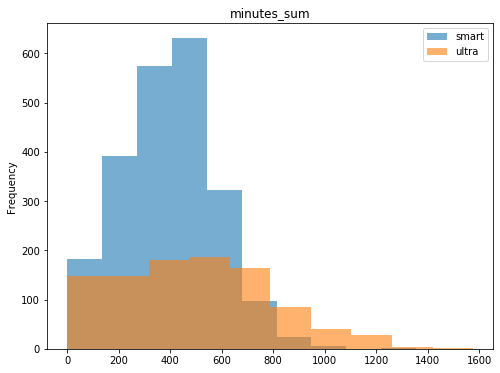

,Статистическая характеристика,smart,ultra
0,Среднее,31.0,44.0
1,Дисперсия,26.0,152.0
2,Стандартное отклонение,5.0,12.0


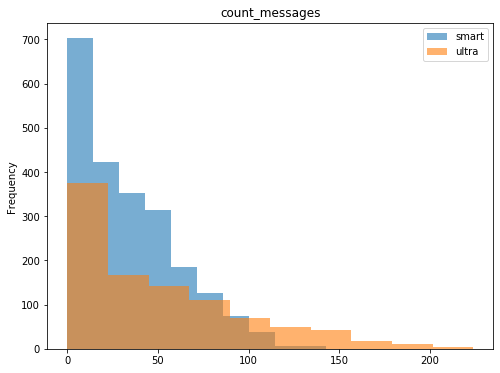

,Статистическая характеристика,smart,ultra
0,Среднее,15058.0,18206.0
1,Дисперсия,7134943.0,8915654.0
2,Стандартное отклонение,2671.0,2986.0


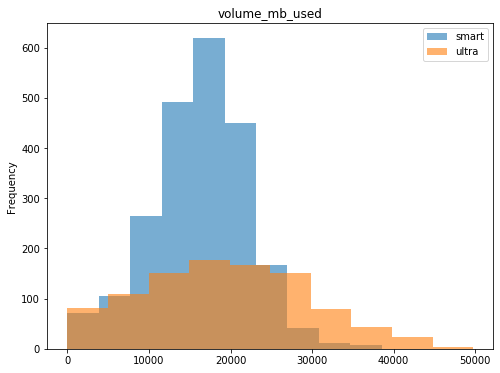

(None, None)

In [18]:
import numpy as np
import matplotlib.pyplot as plt


smart_group = data.query('tariff == "smart"')
ultra_group = data.query('tariff == "ultra"')


#Напишем функцию для подсчета среднего, дисперсии и среднего отклонения, а также для выведения графиков
def sravnenie(group, group2, parametr):
    gpt = group.pivot_table(index = 'month', values = parametr, aggfunc = 'mean')
    vs = np.var(gpt[parametr], ddof = 1).round()
    sds = np.std(gpt[parametr], ddof = 1).round()
    
    gpt2 = group2.pivot_table(index = 'month', values = parametr, aggfunc = 'mean')
    vs2 = np.var(gpt2[parametr], ddof = 1).round()
    sds2 = np.std(gpt2[parametr], ddof = 1).round()
    tablica = [
        ['Среднее', gpt[parametr].mean().round(), gpt2[parametr].mean().round()],
        ['Дисперсия', vs, vs2],
        ['Стандартное отклонение', sds, sds2]
    ]
    entries = ['Статистическая характеристика', 'smart', 'ultra']
    itog = pd.DataFrame(data = tablica, columns = entries)
    
    a = group[parametr].plot(kind = 'hist', alpha = 0.6, figsize = (8,6), legend = True, label='smart')
    group2[parametr].plot(kind = 'hist', alpha = 0.6, ax = a, legend = True, label='ultra')
    a.set_title(parametr)
    return display(itog), plt.show()
    
    
    
    
sravnenie(smart_group, ultra_group, 'minutes_sum')
sravnenie(smart_group, ultra_group, 'count_messages')
sravnenie(smart_group, ultra_group, 'volume_mb_used')


<a id='d'></a>

## Проверим гипотезы

1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

**Рассмотрим первую гипотезу. \
Примем за нулевую: "статистически значимых различий по показателю средней выручки нет". \
А за альтернативную: "средние выручек не равны".**

In [19]:
from scipy import stats as st

profit_ultra = ultra_group['profit']
profit_smart = smart_group['profit']




# Проведем тест Левена на нормальность распределения дисперсий
results1 = st.levene(profit_ultra, profit_smart)
print(results1)
print() 
print()




alpha = .05

results = st.ttest_ind(profit_ultra, profit_smart, equal_var = False)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


LeveneResult(statistic=463.87653707404525, pvalue=3.200022022672433e-96)


p-значение: 0.0
Отвергаем нулевую гипотезу


Проведение теста Левена (КОД ВЫШЕ):

"При p> 0,05 наборы данных соответствуют критерию дисперсии"
    
В нашем случае отличие получилось значимое (< 0,05), поэтому выбираем `equal_var = False`

In [20]:
print('Среднее значение выручки тарифа "Ультра":',profit_ultra.mean())
print('Среднее значение выручки тарифа "Смарт":',profit_smart.mean())

Среднее значение выручки тарифа "Ультра": 2049.6450304259633
Среднее значение выручки тарифа "Смарт": 1139.965470852018


Как можем видеть, статистически значимые различия все же есть. Как итог, скажем, что "средние выручек не равны". Но где среднее больше?

Дополнительно посмотрим на средние значения и сделаем вывод, что выручка у тарифа "ultra" больше, чем у "smart".

In [21]:
print(profit_smart.describe())
print()
print(profit_ultra.describe())

count    2230.000000
mean     1139.965471
std       739.306912
min       550.000000
25%       550.000000
50%       819.500000
75%      1550.000000
max      6417.000000
Name: profit, dtype: float64

count     986.000000
mean     2049.645030
std       335.984614
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4650.000000
Name: profit, dtype: float64


**Рассмотрим вторую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. \ 
Нулевая: "статистически значимых различий по показателю средней выручки нет". \
Альтернативная: "средние выручек не равны".**      

In [22]:
moscow_group = data[data['city'] == 'Москва']['profit']
no_moscow_group = data[data['city'] != 'Москва']['profit']



# Проведем тест Левена на нормальность распределения дисперсий
results2 = st.levene(moscow_group, no_moscow_group)
print(results2)
print() 
print()




alpha = .05

results = st.ttest_ind(moscow_group, no_moscow_group, equal_var = True)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

LeveneResult(statistic=3.050331072876678, pvalue=0.08081621419853822)


p-значение: 0.32665657961728145
Не получилось отвергнуть нулевую гипотезу


По тесту Левена выбираем `equal_var = True`. Так как p > 0,05

Выходит, что средние выручек в Москве и регионах не отличаются. Географический фактор не играет важной роли.

А полученное значение p-value (после проверки второй гипотезы) говорит нам о том, что хотя среднее значение выручки в разных регионах и Москве неодинаково, с вероятностью в почти 33% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними значениями выручек.

<a id='e'></a>

## Вывод 

Про прибыльность того или иного тарифа сказать сложно, не имея под рукой себестоимости услуг (Прибыль = Выручка - Себестоимость). Но если говорить обобщенно, то в среднем с одного пользователя в компанию притекает средств больше по тарифу "ultra".  

И как итог, следует отметить: бОльшее количество "ультра-пользователей" привлечет бОльший денежный оборот (в целом, как и с пользователями тарифа "смарт", разве что для получения такой же выручки потребуется примерно `x2` "смарт-клиентов" больше)

Геолокация пользователей в нашем исследовании важной роли не играет.